# Used Car Price Dataset

**Importing Libraries**

In [226]:
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols

Null Hypothosis: The slop is equal to 0
Alternative Hypothesis: The slop is not equal to 0

In [149]:
df = pd.read_csv('data/Fish.csv')
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [178]:
def volume(x):
    return 
    
df['Volume'] = df['Length1'] * df['Height'] * df['Width']

In [162]:
df['Species'].value_counts()

Perch        53
Bream        35
Roach        19
Pike         17
Parkki        9
Whitefish     6
Name: Species, dtype: int64

In [179]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width,Volume
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200,1074.401280
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056,1289.613312
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961,1389.244539
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555,1491.696945
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340,1693.018644


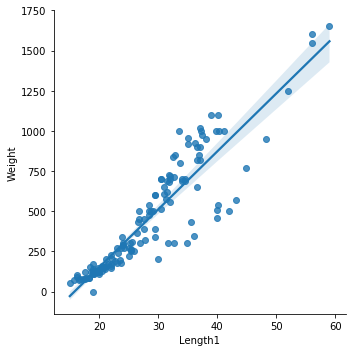

In [161]:
df = df[df['Length1'] >= 15]
sns.lmplot(data=df, x='Length1', y='Weight')

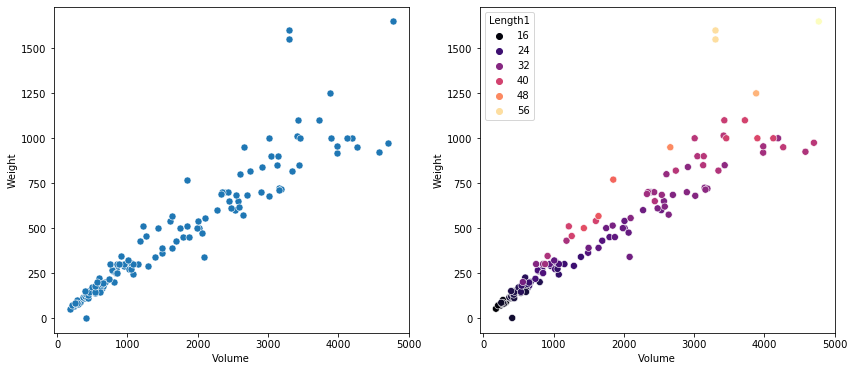

In [205]:
fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(14,6))

# Compare the two independent variables to each other - are they related?
sns.scatterplot(x='Volume', y='Weight', data=df, s=50, ax=ax1)
# The color no represents the percentage of speeding drivers
sns.scatterplot(x='Volume', y='Weight', hue='Length1', data=df, s=50, palette='magma', ax=ax2);

plt.show()

In [204]:
model = ols('Weight ~ Volume + Length1 + Length2 +  Height + Width', data=df).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     611.3
Date:                Mon, 06 Dec 2021   Prob (F-statistic):           6.79e-90
Time:                        21:22:33   Log-Likelihood:                -790.38
No. Observations:                 139   AIC:                             1593.
Df Residuals:                     133   BIC:                             1610.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -162.9203     72.192     -2.257      0.0

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Fish Weight Distribution')]

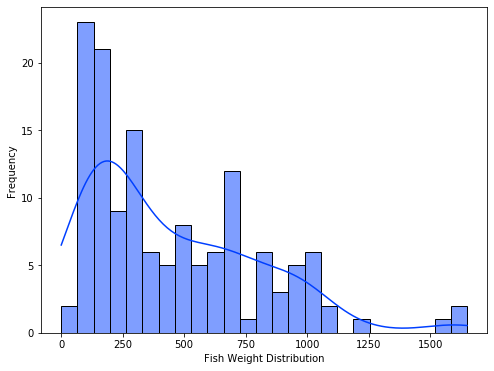

In [218]:
# The 'seaborn' style sheet has nice defaults
plt.style.use('seaborn-bright')


# Create the figure and axes objects
fig, ax = plt.subplots(1, 1, figsize=(8,6))
# Plot the distribution and the kernel density estimate (KDE)
ax = sns.histplot(df['Weight'], kde=True, bins=25)

# Set the axis labels
ax.set(xlabel='Fish Weight Distribution', ylabel='Frequency')

In [220]:
#Central Limit Therom
test = []
for i in range(1000):
    sample = df['Weight'].sample(25)
    
    test.append(sample.mean())

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Fish Weight Distribution')]

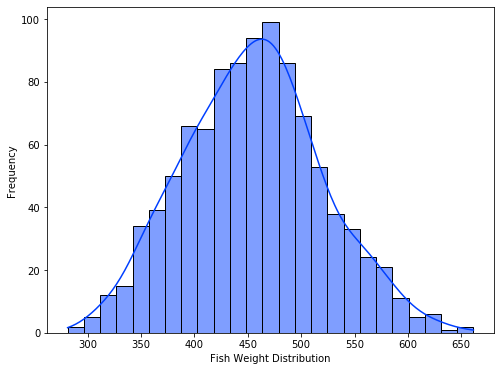

In [222]:
# Create the figure and axes objects
fig, ax = plt.subplots(1, 1, figsize=(8,6))
# Plot the distribution and the kernel density estimate (KDE)
ax = sns.histplot(test, kde=True, bins=25)

# Set the axis labels
ax.set(xlabel='Fish Weight Distribution', ylabel='Frequency')


### Compare Statistical Significance of Bream Fish Weight mean to population mean

- Null Hypothesis: Bream Fish Weight Mean = Population Fish Mean
- Alternative Hypothesis: Bream Fish Weight mean != Fish Mean
- p value at 0.05

In [224]:
bream_df = df[df['Species'] == 'Bream']

In [231]:
population_mean = df['Weight'].mean()
bream_mean = bream_df['Weight'].mean()
bream_std = bream_df['Weight'].std()
bream_size = bream_df.shape[0]

In [232]:
# Creating scores data
class_scores = stats.norm.rvs(loc=bream_mean, scale=bream_std, size=bream_size)

# Doing a one sample t-test
stats.ttest_1samp(bream_df['Weight'], population_mean)

Ttest_1sampResult(statistic=4.665726493678552, pvalue=4.640115518955322e-05)